In [41]:
from sys import platform as _platform
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
#if _platform =='linux2':
#    path = '../data/data_sleep/' 
#else:
#    #mets ton path ici et ça devrait marcher :)
#    path = ""
path = "./data/"

In [3]:
train=pd.read_csv(path+"data_frequences.csv")
labels=pd.read_csv(path+"challenge_output_data_training_file_sleep_stages_classification.csv", sep=";")

In [43]:
from sklearn.cross_validation import train_test_split
X_columns = train.columns
X_train, X_test, y_train, y_test = train_test_split(
    train, labels["TARGET"], test_size=0.2, random_state=0)

In [61]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(shuffle = True, loss = 'hinge', n_iter= 150, penalty = "l2")
sgd.fit(X_train, y_train)
print accuracy_score(sgd.predict(X_test),y_test)
print("Score on train data : ", accuracy_score(y_train, sgd.predict(X_train)))

0.812289163136
('Score on train data : ', 0.67903465445930211)


In [58]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.grid_search import GridSearchCV 
from sklearn.metrics import accuracy_score

alphas = np.logspace(-6, 0, 20)

mnb =  GridSearchCV(MultinomialNB(), dict(alpha=alphas), cv=10, n_jobs = 3).fit(X_train, y_train)
print("MNB", "- Best alpha & associated score", mnb.best_params_, mnb.best_score_)
print("Score on test_data : ", accuracy_score(y_test, mnb.predict(X_test)))

('MNB', '- Best alpha & associated score', {'alpha': 9.9999999999999995e-07}, 0.51242822149941769)
('Score on test_data : ', 0.51814969482814011)


In [51]:
mnb.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
print "Score on test data : ",accuracy_score(mnb.predict(X_test),y_test)
print("Score on train data : ", accuracy_score(y_train, mnb.predict(X_train)))

Score on test data :  0.518149694828
('Score on train data : ', 0.51058105449142677)


In [52]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=1, n_estimators=100, max_depth= 60)
rf.fit(X_train, y_train)
predicted_label = rf.predict(X_test)

print("Random Forest - Score on test_data : ", accuracy_score(y_test, predicted_label))
print("Random Forest - Score on train data : ", accuracy_score(y_train, rf.predict(X_train)))

('Random Forest - Score on test_data : ', 0.72614840989399299)
('Random Forest - Score on train data : ', 1.0)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import cohen_kappa_score
rf = RandomForestClassifier(random_state=1, n_estimators=100, max_depth= 20)
rf.fit(X_train, y_train)
predicted_label = rf.predict(X_test)

print("Random Forest - kappa Score on test_data : ", cohen_kappa_score(y_test, predicted_label))
print("Random Forest - kappa Score on train data : ", cohen_kappa_score(y_train, rf.predict(X_train)))

('Random Forest - kappa Score on test_data : ', 0.54882147427922845)
('Random Forest - kappa Score on train data : ', 0.9946599307775783)


In [39]:
scores = cross_val_score(rf, X_train, y_train, cv=5, scoring="accuracy",n_jobs=3)
print("log RMSE: {:.4f} +/-{:.4f}".format(
    np.mean(scores), np.std(scores)))

log RMSE: 0.7199 +/-0.0027


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import cohen_kappa_score
gb = GradientBoostingClassifier(random_state=1, n_estimators=100)
gb.fit(X_train, y_train)
predicted_label = gb.predict(X_test)

print("Random Forest - kappa Score on test_data : ", cohen_kappa_score(y_test, predicted_label))
print("Random Forest - kappa Score on train data : ", cohen_kappa_score(y_train, gb.predict(X_train)))

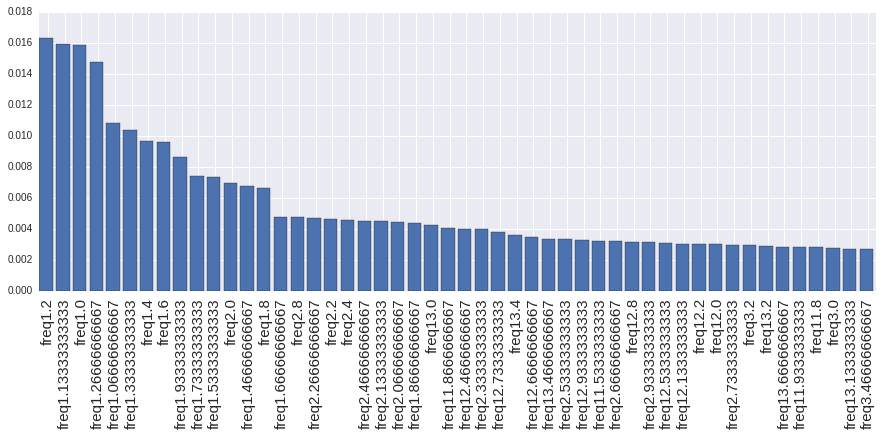

In [44]:
plt.figure(figsize=(15, 5))

ordering = np.argsort(rf.feature_importances_)[::-1][:50]

importances = rf.feature_importances_[ordering]
feature_names = X_columns[ordering]

x = np.arange(len(feature_names))
plt.bar(x, importances)
plt.xticks(x + 0.5, feature_names, rotation=90, fontsize=15);